# DS 3000 - DS Practicum 1

**Student Names**: Tommaso Maga, 

**Date**: 02/06/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1 - The DS Problem: 

In your own words, formulate the Data Science problem that you were given.

In [1]:
#Write your python code to answer question 1. You can add new cells below as needed.

## Question 2 - Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.


In [59]:
#Converting datatypes
import pandas as pd

df = pd.read_csv('Downloads/2019_ONTIME_REPORTING_FSW.csv')

# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Convert DEP_TIME and ARR_TIME to integers
df['DEP_TIME'] = df['DEP_TIME'].fillna(0).astype(int)
df['ARR_TIME'] = df['ARR_TIME'].fillna(0).astype(int)

# Convert DISTANCE to float
df['DISTANCE'] = df['DISTANCE'].astype(float)

print(df.dtypes)

FL_DATE         datetime64[ns]
CARRIER_CODE            object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN                  object
ORIGIN_ST               object
DEST                    object
DEST_ST                 object
DEP_TIME                 int64
DEP_DELAY              float64
ARR_TIME                 int64
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE               float64
dtype: object


In [ ]:
#Filling in missing data
# replace missing values with 'Unknown' in tail_num column
df['TAIL_NUM'] = df['TAIL_NUM'].fillna('Unknown')

# fill in missing values with the median in columns: dep_delay, arr_delay, and elapsed time
numeric_cols = ['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

missing_values = df.isna().sum()
missing_values_percentage = round(missing_values/(len(df))*100, 2)

print(missing_values_percentage)

print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  object        
 2   TAIL_NUM      object        
 3   FL_NUM        int64         
 4   ORIGIN        object        
 5   ORIGIN_ST     object        
 6   DEST          object        
 7   DEST_ST       object        
 8   DEP_TIME      int64         
 9   DEP_DELAY     float64       
 10  ARR_TIME      int64         
 11  ARR_DELAY     float64       
 12  ELAPSED_TIME  float64       
 13  DISTANCE      float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 202.7+ MB
None
Summary Statistics:
                             FL_DATE        FL_NUM      DEP_TIME  \
count                        1897503  1.897503e+06  1.897503e+06   
mean   2019-07-03 07:04:02.585545984  2.049927e+03  1.322513e+03   
min              

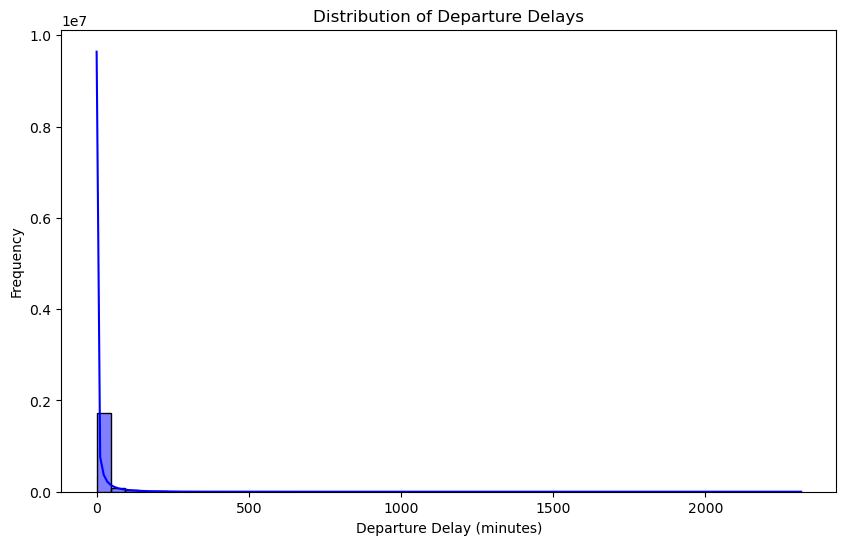

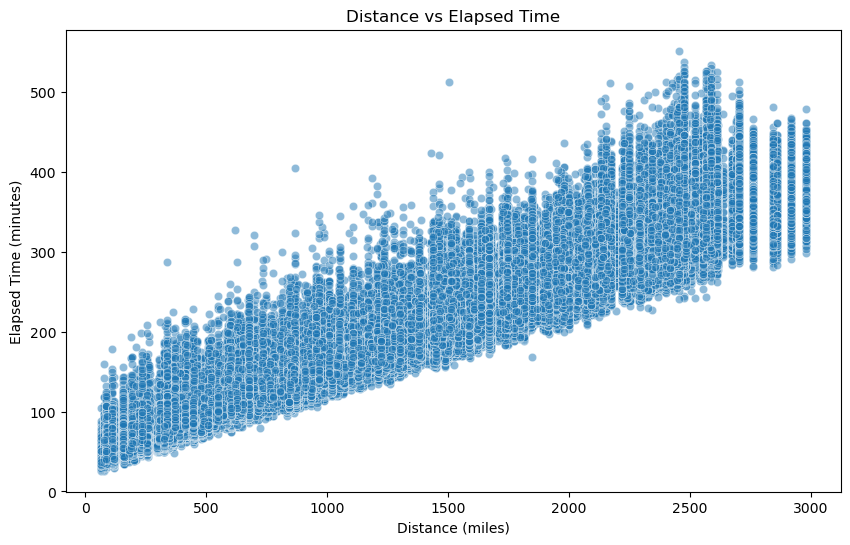

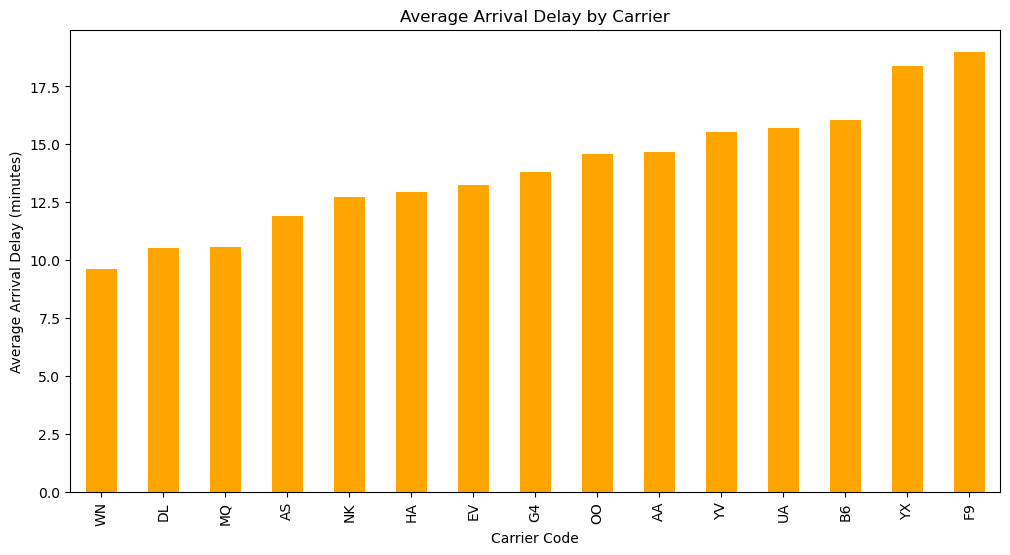

In [73]:
#summary statistics/visualizations
# General info about the dataset
print("Dataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

# Quick look at the first few rows
print("Sample Rows:")
print(df.head())

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Departure delays
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True, color='blue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distance vs elapsed time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='ELAPSED_TIME', data=df, alpha=0.5)
plt.title('Distance vs Elapsed Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Elapsed Time (minutes)')
plt.show()

# Average arrival delay by carrier
avg_arr_delay_by_carrier = df.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()

# Bar chart
plt.figure(figsize=(12, 6))
avg_arr_delay_by_carrier.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()


## Question 3 - (20 Points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.


In [ ]:
#Write your python code to answer question 3. You can add new cells below as needed.

## Question 4 - (20 Points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.


In [ ]:
#Write your python code to answer question 4. You can add new cells below as needed.

## Question 5 - (30 Points)

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


In [ ]:
#Write your python code to answer question 5. You can add new cells below as needed.

## Question 6 - (20 Points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.



In [ ]:
#Write your python code to answer question 6. You can add new cells below as needed.

## Question 7 - Summary

Summarize the overall analysis and share THREE (3) key findings.
